In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow_hub as hub
import cv2
from sklearn.metrics import classification_report, confusion_matrix
import itertools

D:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Users\pc\anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarning: Passing (type, 1)

In [2]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.callbacks import Tensorboard

In [3]:
path_to_zip = 'E:\Final_Year_Project'
PATH = os.path.join(os.path.dirname(path_to_zip), 'training_model')

In [4]:
train_dir = os.path.join(PATH, 'training')
validation_dir = os.path.join(PATH, 'test')

In [5]:
train_AP2_dir = os.path.join(train_dir, 'AP2')  
train_AP3_dir = os.path.join(train_dir, 'AP3')
train_AP4_dir = os.path.join(train_dir, 'AP4')
train_AP5_dir = os.path.join(train_dir, 'AP5')
train_PLAX_dir = os.path.join(train_dir, 'PLAX')
train_PSAXAP_dir = os.path.join(train_dir, 'PSAX-AP')
train_PSAXAV_dir = os.path.join(train_dir, 'PSAX-AV')
train_PSAXMID_dir = os.path.join(train_dir, 'PSAX-MID')
train_PSAXMV_dir = os.path.join(train_dir, 'PSAX-MV')# directory with our training pictures

validation_AP2_dir = os.path.join(validation_dir, 'AP2')  
validation_AP3_dir = os.path.join(validation_dir, 'AP3')
validation_AP4_dir = os.path.join(validation_dir, 'AP4')
validation_AP5_dir = os.path.join(validation_dir, 'AP5')
validation_PLAX_dir = os.path.join(validation_dir, 'PLAX')
validation_PSAXAP_dir = os.path.join(validation_dir, 'PSAX-AP')
validation_PSAXAV_dir = os.path.join(validation_dir, 'PSAX-AV')
validation_PSAXMID_dir = os.path.join(validation_dir, 'PSAX-MID')
validation_PSAXMV_dir = os.path.join(validation_dir, 'PSAX-MV')# directory with our validation pictures

In [8]:
num_AP2_tr = len(os.listdir(train_AP2_dir))
num_AP3_tr = len(os.listdir(train_AP3_dir))
num_AP4_tr = len(os.listdir(train_AP4_dir))
num_AP5_tr = len(os.listdir(train_AP5_dir))
num_PLAX_tr = len(os.listdir(train_PLAX_dir))
num_PSAXAP_tr = len(os.listdir(train_PSAXAP_dir))
num_PSAXAV_tr = len(os.listdir(train_PSAXAV_dir))
num_PSAXMID_tr = len(os.listdir(train_PSAXMID_dir))
num_PSAXMV_tr = len(os.listdir(train_PSAXMV_dir))

num_AP2_val = len(os.listdir(validation_AP2_dir))
num_AP3_val = len(os.listdir(validation_AP3_dir))
num_AP4_val = len(os.listdir(validation_AP4_dir))
num_AP5_val = len(os.listdir(validation_AP5_dir))
num_PLAX_val = len(os.listdir(validation_PLAX_dir))
num_PSAXAP_val = len(os.listdir(validation_PSAXAP_dir))
num_PSAXAV_val = len(os.listdir(validation_PSAXAV_dir))
num_PSAXMID_val = len(os.listdir(validation_PSAXMID_dir))
num_PSAXMV_val = len(os.listdir(validation_PSAXMV_dir))

total_train = num_AP2_tr + num_AP3_tr + num_AP4_tr + num_AP5_tr + num_PLAX_tr + num_PSAXAP_tr+ num_PSAXAV_tr + num_PSAXMID_tr + num_PSAXMV_tr
total_val = num_AP2_val + num_AP3_val + num_AP4_val + num_AP5_val + num_PLAX_val + num_PSAXAP_val+ num_PSAXAV_val + num_PSAXMID_val + num_PSAXMV_val



In [9]:
print('total training images:', total_train)
print('total test images:', total_val)

total training images: 8997
total test images: 875


In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255,validation_split = 0.2) # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255) # Generator for our validation data

batch_size = 32
epochs = 10
IMG_HEIGHT = 224
IMG_WIDTH = 224

In [11]:
train_data_gen =train_image_generator.flow_from_directory(batch_size=batch_size,
                                                          directory=train_dir,
                                                          color_mode='rgb',
                                                          shuffle=True,
                                                          target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                          class_mode='categorical')

val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              shuffle=False,
                                                              class_mode='categorical')


Found 8997 images belonging to 9 classes.
Found 875 images belonging to 9 classes.


In [12]:
#train_data_gen = tf.image.rgb_to_grayscale(train_data_gen)
print('Training class: ',train_data_gen.class_indices.keys())
print('Validation class: ',val_data_gen.class_indices.keys())

Training class:  dict_keys(['AP2', 'AP3', 'AP4', 'AP5', 'PLAX', 'PSAX-AP', 'PSAX-AV', 'PSAX-MID', 'PSAX-MV'])
Validation class:  dict_keys(['AP2', 'AP3', 'AP4', 'AP5', 'PLAX', 'PSAX-AP', 'PSAX-AV', 'PSAX-MID', 'PSAX-MV'])


In [13]:
sample_training_images, _ = next(train_data_gen)


In [14]:
import random

random.shuffle(sample_training_images)

In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()


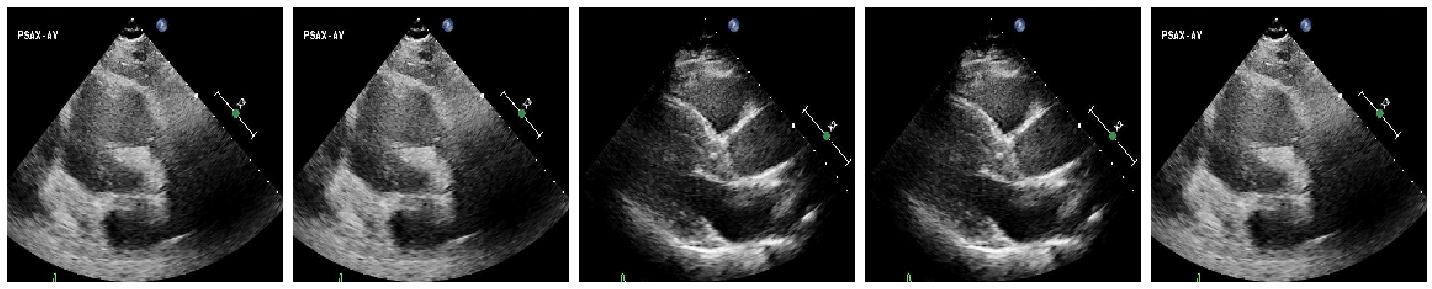

In [16]:
plotImages(sample_training_images[:5])


In [17]:
base_model = tf.keras.applications.VGG16(input_shape=(IMG_HEIGHT, IMG_WIDTH ,3),
                                               include_top=False)


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [19]:
base_model.trainable = False


In [20]:
model = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(9, activation = 'softmax')
])


In [22]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [23]:
optimizer_model = tf.keras.optimizers.Adam(learning_rate=0.001, name='Adam', decay=0.0001)
loss_model = tf.keras.losses.CategoricalCrossentropy(from_logits=True)
model.compile(optimizer_model, loss="categorical_crossentropy", metrics=['accuracy'])


In [24]:
#model.trainable = False

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0

In [27]:
checkpoint_filepath = '/tmp/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_freq='epoch',
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True)


In [28]:
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=total_train// batch_size ,
    epochs=epochs,
    callbacks = [model_checkpoint_callback],
    validation_data=val_data_gen,
    validation_steps=total_val// batch_size 
)


Epoch 1/10
281/281 [==============================] - 107s 380ms/step - loss: 2.0190 - acc: 0.2775 - val_loss: 1.0550 - val_acc: 0.3785
Epoch 2/10
281/281 [==============================] - 97s 346ms/step - loss: 1.0336 - acc: 0.5669 - val_loss: 1.0472 - val_acc: 0.5255
Epoch 3/10
281/281 [==============================] - 97s 346ms/step - loss: 0.7606 - acc: 0.6970 - val_loss: 0.3778 - val_acc: 0.8738
Epoch 4/10
281/281 [==============================] - 96s 342ms/step - loss: 0.6480 - acc: 0.7538 - val_loss: 0.5772 - val_acc: 0.7118
Epoch 5/10
281/281 [==============================] - 97s 346ms/step - loss: 0.6851 - acc: 0.7467 - val_loss: 0.3232 - val_acc: 0.9016
Epoch 6/10
281/281 [==============================] - 96s 342ms/step - loss: 0.5803 - acc: 0.7926 - val_loss: 0.3542 - val_acc: 0.9340
Epoch 7/10
281/281 [==============================] - 96s 342ms/step - loss: 0.5559 - acc: 0.8096 - val_loss: 0.3872 - val_acc: 0.8623
Epoch 8/10
281/281 [==============================] - 

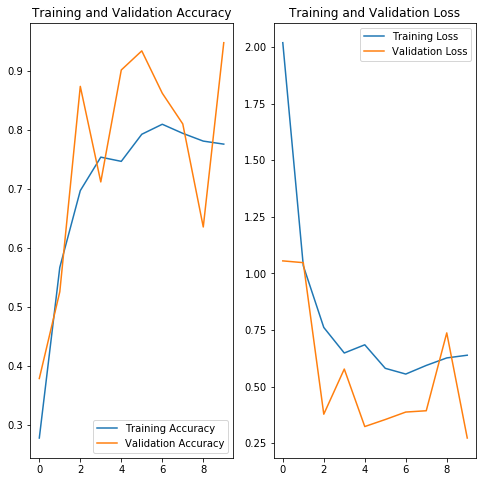

In [29]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [30]:
best_model = tf.keras.models.load_model('/tmp/checkpoint')
best_model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 7, 7, 512)         14714688  
_________________________________________________________________
flatten (Flatten)            (None, 25088)             0         
_________________________________________________________________
dense (Dense)                (None, 512)               12845568  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
________________________________

In [31]:
Y_pred = best_model.predict_generator(val_data_gen, total_val // batch_size+1)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
print(confusion_matrix(val_data_gen.classes, y_pred))
print('Classification Report')
#target_names = ["AP2","AP3","AP4","AP5","PLAX","PSAX-AP","PSAX-AV","PSAX-MID","PSAX-MV"]
#target_names = ['AP3','AP5','PSAX-AV']
target_names = list(val_data_gen.class_indices.keys())
print(classification_report(val_data_gen.classes, y_pred, target_names=target_names))

Confusion Matrix
[[ 95   0   0   0   0   0   0   0   0]
 [  7  88   0   0   0   0   0   0   0]
 [  0   0  78  13   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0  97   0   0]
 [  0   0   0   0   0   1   0  92   0]
 [  0   0   0   0   0  24   0   3  77]]
Classification Report
              precision    recall  f1-score   support

         AP2       0.93      1.00      0.96        95
         AP3       1.00      0.93      0.96        95
         AP4       1.00      0.86      0.92        91
         AP5       0.88      1.00      0.94       100
        PLAX       1.00      1.00      1.00       100
     PSAX-AP       0.80      1.00      0.89       100
     PSAX-AV       1.00      1.00      1.00        97
    PSAX-MID       0.97      0.99      0.98        93
     PSAX-MV       1.00      0.74      0.85       104

    accuracy                           0.95       875
   macro avg 

In [32]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 2 2 3 2 3 3 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 3 3 3 3 3 2 2 2 2 3 3 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 5 5 5 5 5 5 5 5 5 5 5 5 

In [33]:
#model.save('my_model.model')

In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[ 95   0   0   0   0   0   0   0   0]
 [  7  88   0   0   0   0   0   0   0]
 [  0   0  78  13   0   0   0   0   0]
 [  0   0   0 100   0   0   0   0   0]
 [  0   0   0   0 100   0   0   0   0]
 [  0   0   0   0   0 100   0   0   0]
 [  0   0   0   0   0   0  97   0   0]
 [  0   0   0   0   0   1   0  92   0]
 [  0   0   0   0   0  24   0   3  77]]


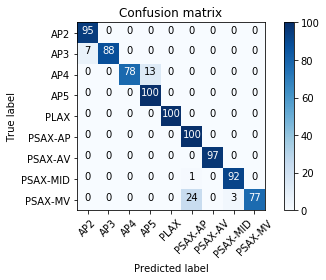

In [35]:
results = best_model.predict(val_data_gen, total_val // batch_size)

# convert from class probabilities to actual class predictions
predicted_classes = np.argmax(results, axis=1)

# Names of predicted classes
class_names = list(val_data_gen.class_indices.keys())
#class_names = ['AP3','AP5','PSAX-AV']

# Generate the confusion matrix
cnf_matrix = confusion_matrix(val_data_gen.classes, y_pred)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix')

plt.show()